<a href="https://colab.research.google.com/github/arijitdas0211/ML_Python/blob/main/Google_Colab_Emotion_Detection_Live_Image_Capture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas matplotlib
!pip install opencv-python
!pip install keras
!pip install deepface

In [7]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

24-02-17 14:32:18 - Directory /root/.deepface created
24-02-17 14:32:18 - Directory /root/.deepface/weights created


In [8]:
def take_photo(filename='photo.jpg', quality=1):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


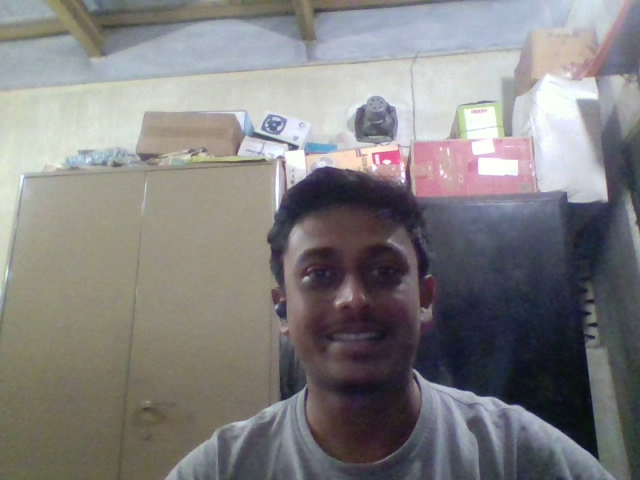

'Image' object has no attribute 'save'


In [9]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
  Image(filename).save()
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Image Found...


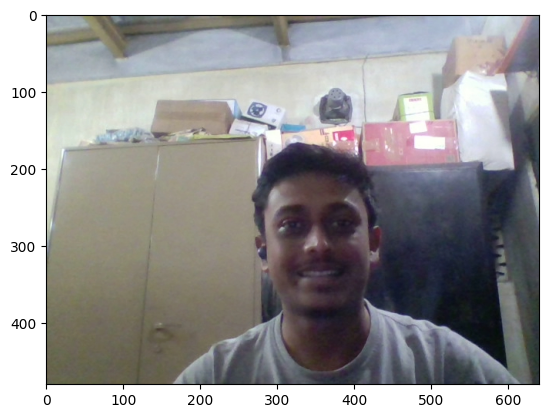

In [10]:
try:
  img = cv2.imread('/content/photo.jpg')
  print('Image Found...')
except Exception as err:
  print(str(err),'. \nPlease Capture and upload image first')
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
predictions = DeepFace.analyze(img, 'emotion')

24-02-17 14:32:33 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 31.7MB/s]


In [12]:
predictions
print(predictions)
print("Type is:- ", type(predictions))

[{'emotion': {'angry': 0.02512051291550773, 'disgust': 2.8910068771811902e-09, 'fear': 0.35132979739932996, 'happy': 0.0604200387530797, 'sad': 0.06360965577980314, 'surprise': 1.1017654747823165, 'neutral': 98.39775552736256}, 'dominant_emotion': 'neutral', 'region': {'x': 263, 'y': 203, 'w': 176, 'h': 176}, 'face_confidence': 6.387560109782498}]
Type is:-  <class 'list'>


In [13]:
print(predictions[0]['dominant_emotion'])

neutral
